# HELP International
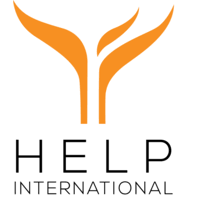

`Objective`: Indentify Clusters of countries by categorising them accoording to the socio-economic and health factors so that HELP International's CEO can allocate 10 million dollars to the countires which are in the dierest need of help.

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#importing packages used for hopkins
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#importing ibraries for hierarchial clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## Reading the Data

In [4]:
#Reading the data and viewing it.
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
#Getting the shape of the dataframe
df.shape

(167, 10)

In [6]:
#Checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
#Using describe() on dataframe to get summary of numeric data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [8]:
#Getting count of null values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Fortunately there are no nulls..yay!!

## Data Preprocessing

As noticed, exports, health and imports are given in %age of GDP, Let's convert them into proper values so that clustering is done on the  value.

In [9]:
# Converting, health, exports and imports into the  atual values instead of percentage.
df['exports']=df['exports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Exploratory Data Analysis

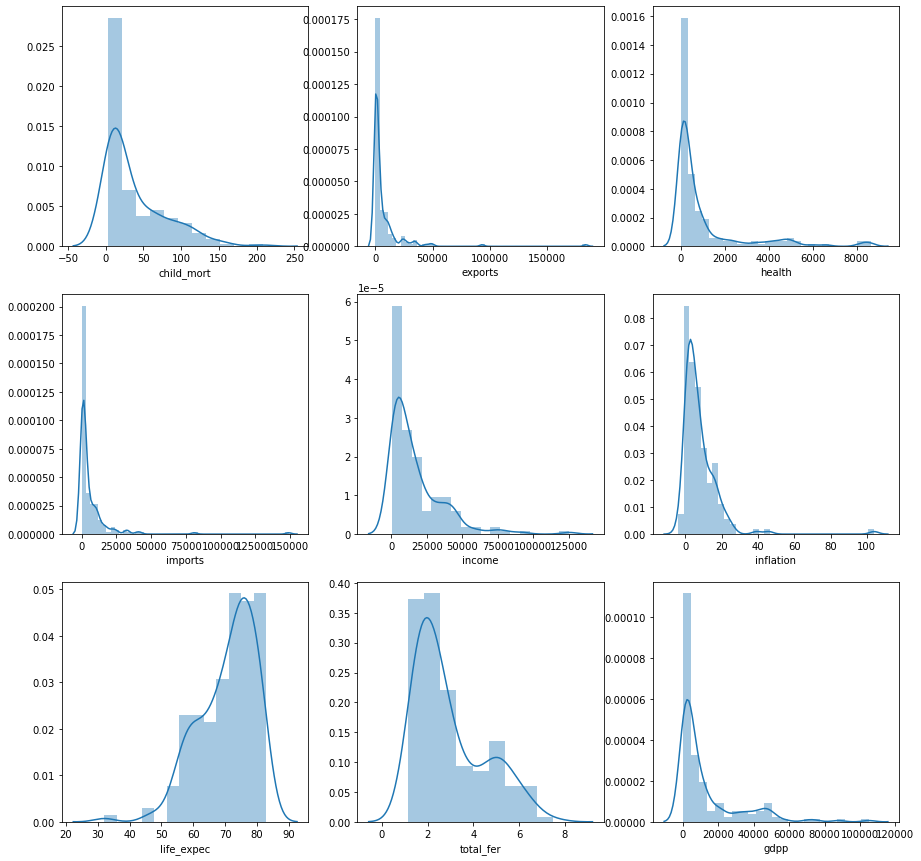

In [10]:
#Plotting dstribution plot to se the distribution of each column.
plt.figure(figsize=[15,15])
f=df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

plt.show()

`Inferences`:
- Child Mortality is positively skewed which is expected as we can't have many countries with high mortality rate. It is observed in very few countries.
- Life expectency is negativelyskewed, again it adheres to the theory.
- GDP per capita is obserev to be in 0 and 5000 in most of the countries.
- total_fer is the highest in 1-3

<Figure size 2160x2160 with 0 Axes>

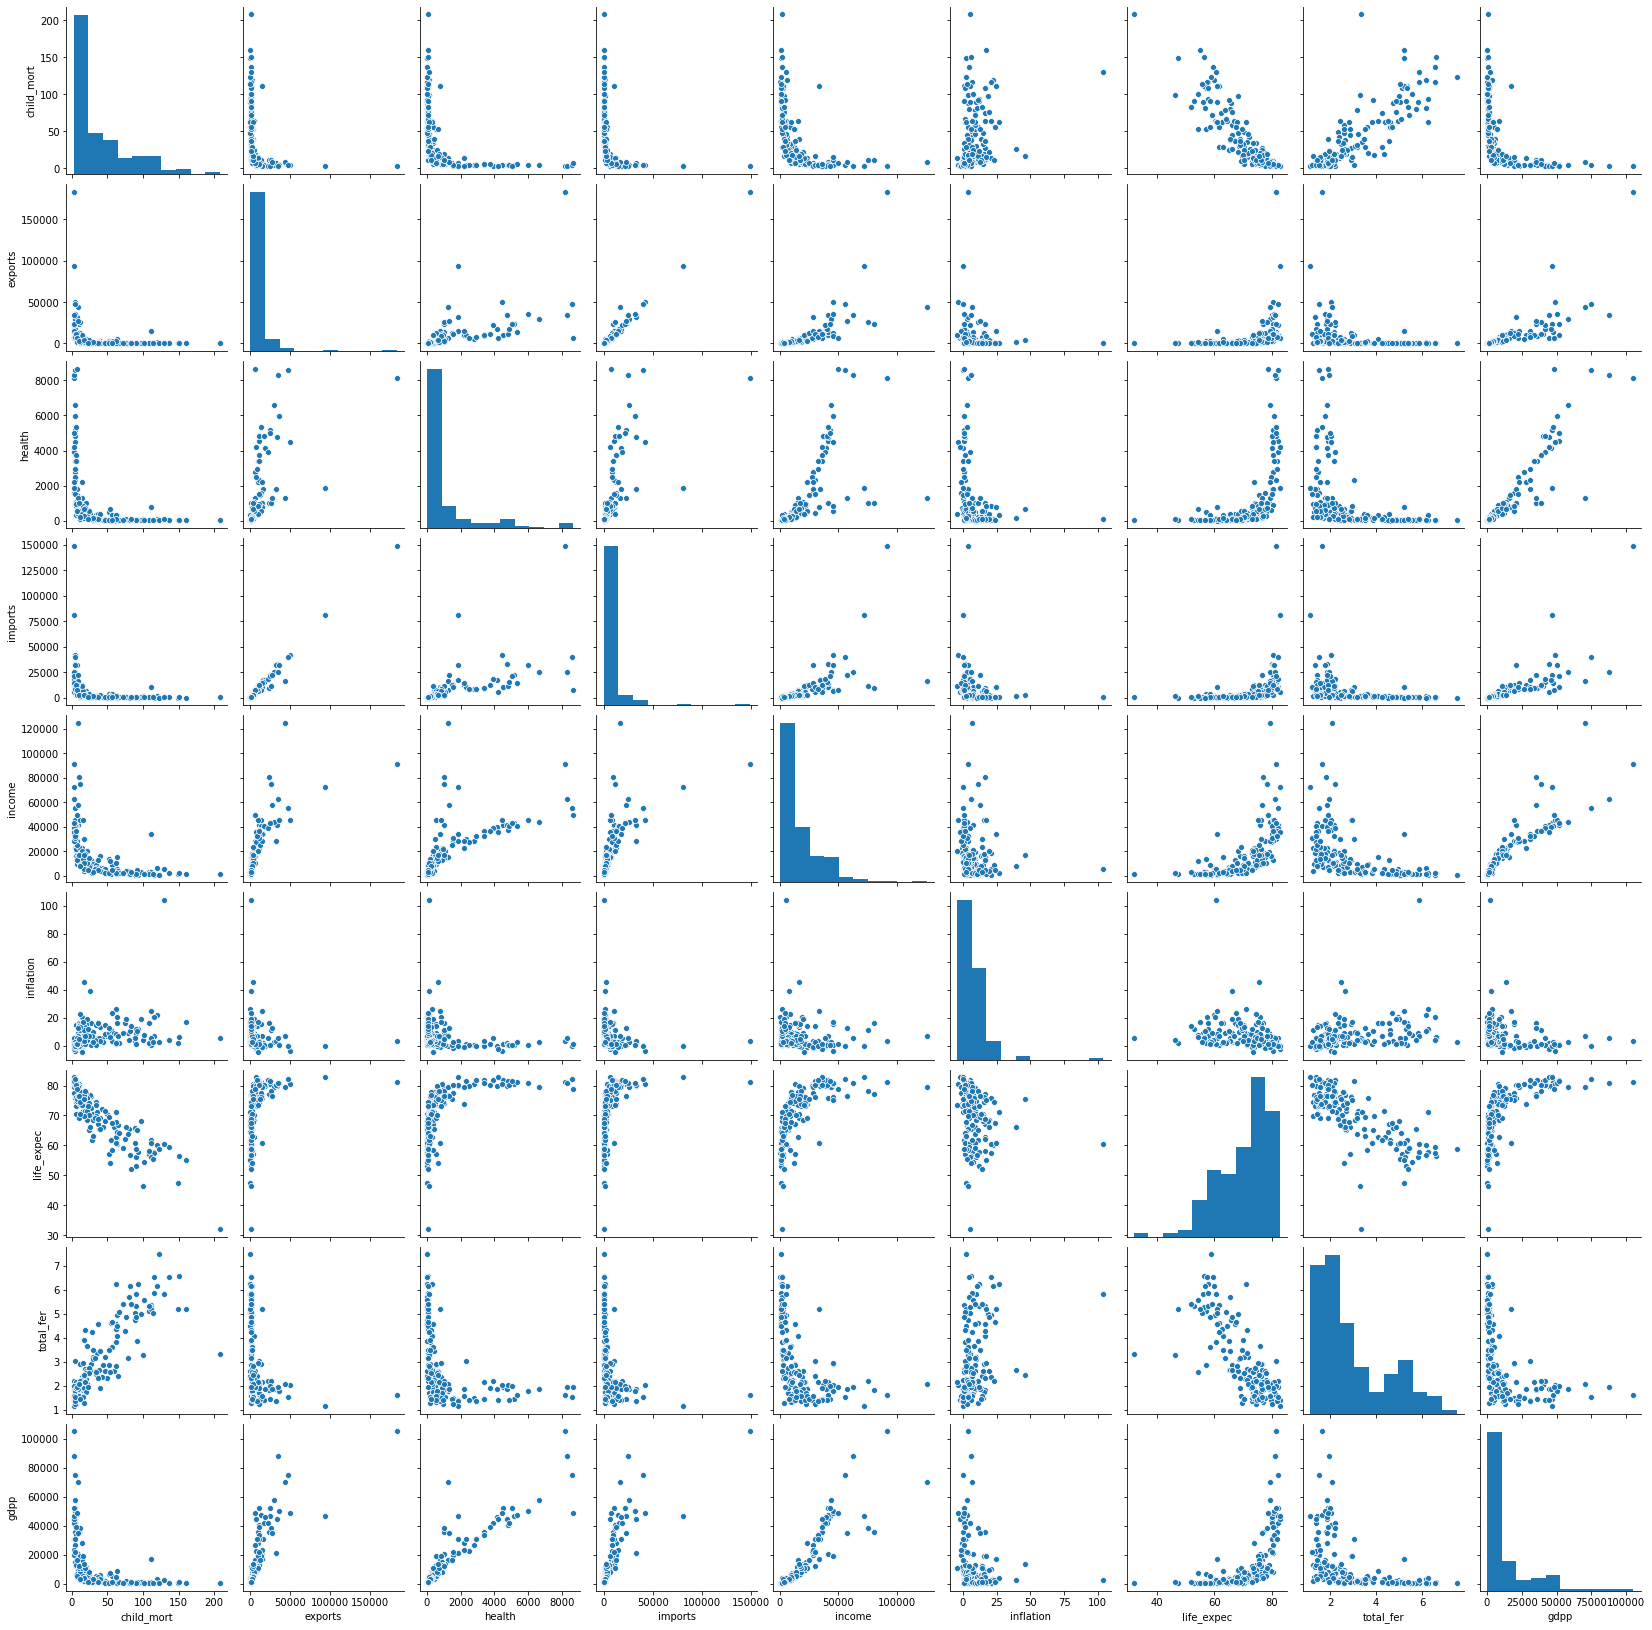

In [11]:
# Checking scatter plot and histograms of the graphs
plt.figure(figsize=[30,30])
sns.pairplot(data=df)
plt.show()

`inferences`: 
1. Child Mortality rate and life expectancy are negatively correlated as expected
2. Income and GDPP is postive correlatd.

## Outlier Detection

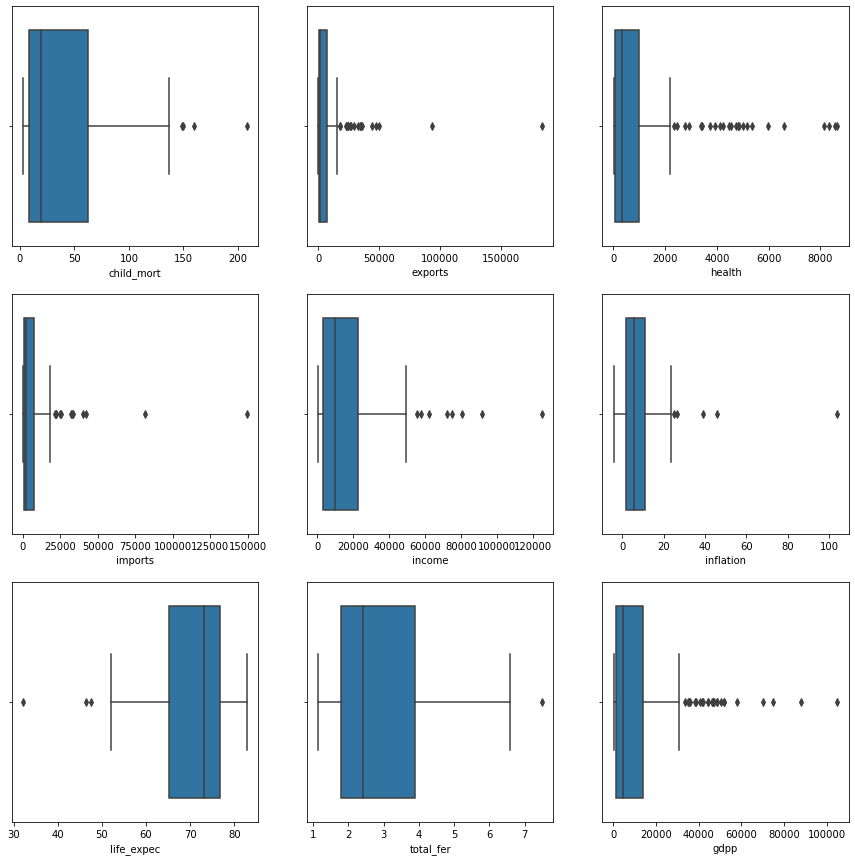

In [12]:
#Checking for outliers
plt.figure(figsize=[15,15])
f=df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

plt.show()

`Inference`:
Note: since the data isn't enough considering dropping the row isn't worth it.
1. Child_mort has outlirs on right end. These outliers are our target, i.e we are finding countries with poor health condition. Hence we can't drop this or make any changes to it..
2. Income has outliers on right end. These outliers are not part our target, hence we can perform slow cap on them.
3. Health has outiers on right end. These outliers aren't part of our target as we care for countries with low expenditure on health. Hence we can perform slow capping on them.
4. Import and exports both have outliers on right end. These outliers are not part our target, hence we can perform slow cap on them. We care for countries with low imports and exports
5. Inflation has outliers on the riight end. These outliers are our target as we care for country who's economy is getting inflated. Hence we won't perform capping to it.
6. life_expec has outliers to the left end. These outliers are our target since our we are finding countries with low life_expec implying poor health of the country. Hence we won't perform capping to it.
7. Total fertility and gdpp has outliers to the right end. Since the these outliers aren't part of our outliers, we'll cap them.

In [13]:
#Performing capping to the data
cols=['income','health','imports','exports','total_fer','gdpp']
for i in cols:
    q1=df[i].quantile(0.01)
    q3=df[i].quantile(0.99)
    
    df[i][df[i]<=q1]=q1
    df[i][df[i]>=q3]=q3

## Scaling the Data

In [14]:
#Scaling the data
scalar=StandardScaler()
df_scaled=scalar.fit_transform(df.drop("country",axis=1))

In [15]:
#Making a dataframe of scaled data
df_scaled=pd.DataFrame(df_scaled)
df_scaled.columns=df.drop("country",axis=1).columns
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.926928,-0.702314
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.865911,-0.498775
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.035427,-0.477483
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.154642,-0.531000
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.544433,-0.032079


## Hopkins Statistics

In [16]:
#Function for hopkins
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [17]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df_scaled)

0.9068816344902096

## SSD

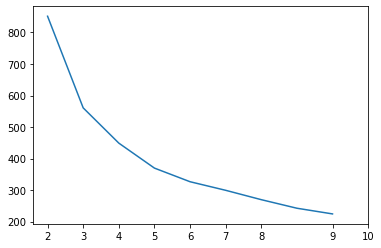

In [18]:
#Finding an optimal number of k using ssd.
ssd=[]
arr=[2,3,4,5,6,7,8,9,10]
for i in arr:
    kmeans=KMeans(n_clusters=i,max_iter=30)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)
plt.xticks([0,1,2,3,4,5,6,8,9],arr)
plt.show()

`Inference`: According to the graph,there's an elbow at 3 and there isn't much deviation after it at 4, hence that could be our optimal number

## Silhouette Analysis

For n_clusters=2, the silhouette score is 0.47851073561939855
For n_clusters=3, the silhouette score is 0.42334486995999815
For n_clusters=4, the silhouette score is 0.4091680372207743
For n_clusters=5, the silhouette score is 0.41549317039597533
For n_clusters=6, the silhouette score is 0.3166816119375585
For n_clusters=7, the silhouette score is 0.32413934628691293
For n_clusters=8, the silhouette score is 0.3217027644137382
For n_clusters=9, the silhouette score is 0.29516946285436785


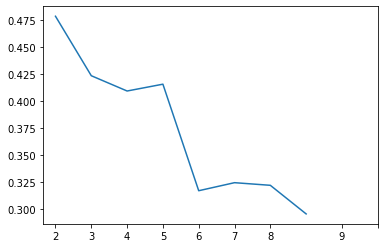

In [19]:
# Performing silhoouette analysis to get optimal k value.
arr=[2,3,4,5,6,7,8,9]
sil=[]
for i in arr:
    kmeans=KMeans(n_clusters=i,max_iter=30,random_state=100)
    kmeans.fit(df_scaled)
    c_labels=kmeans.labels_
    
    silhouette_avg = silhouette_score(df_scaled, c_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
    sil.append(silhouette_avg)

plt.plot(sil)
plt.xticks([0,1,2,3,4,5,6,8,9],arr)
plt.show()  

`Inference`:
Highest silhoutte score is at 2 followed by 3.Since two is generally not a good way in categorize the coutries, Hence we choose the  optimal number of cluster to be 3.

## Modelling

In [20]:
#Running a K-Means model on n=3
kmeans=KMeans(n_clusters=3,max_iter=50,random_state=100)
kmeans.fit(df_scaled)
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [21]:
#merging cluster labels which we got though K-means`
df['cluster_id']=kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2


## Understanding and visualizing clusters

In [22]:
# Checking the distribution of cluster_id
df['cluster_id'].value_counts()

2    92
0    48
1    27
Name: cluster_id, dtype: int64

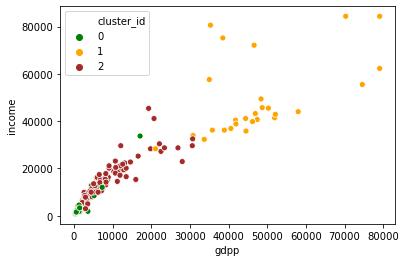

In [23]:
#Scatter plot of income vs gdpp and viewing the cluster
sns.scatterplot(x="gdpp",y="income",hue="cluster_id",data=df,palette=['green','orange','brown'])
plt.show()

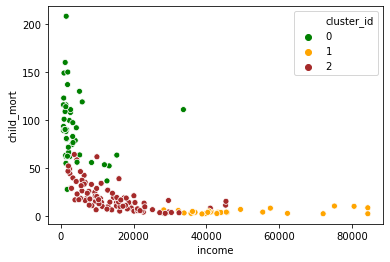

In [24]:
#Scatter plot of income vs child_mort and viewing the cluster
sns.scatterplot(x="income",y="child_mort",hue="cluster_id",data=df,palette=['green','orange','brown'])
plt.show()

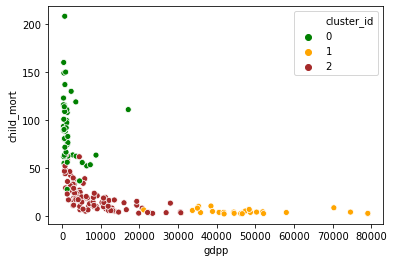

In [25]:
#Scatter plot of gdpp vs child_mort and viewing the cluster
sns.scatterplot(x="gdpp",y="child_mort",hue="cluster_id",data=df,palette=['green','orange','brown'])
plt.show()

## Cluster Profiling

In [26]:
#calculating mean of gdpp, income, child_mort of different ids
df.groupby("cluster_id")['gdpp','income','child_mort'].mean()

,gdpp,income,child_mort
cluster_id,,,
0,1911.400833,3901.010000,91.610417
1,47476.888889,49057.333333,5.092593
2,8226.869565,14169.456522,20.177174


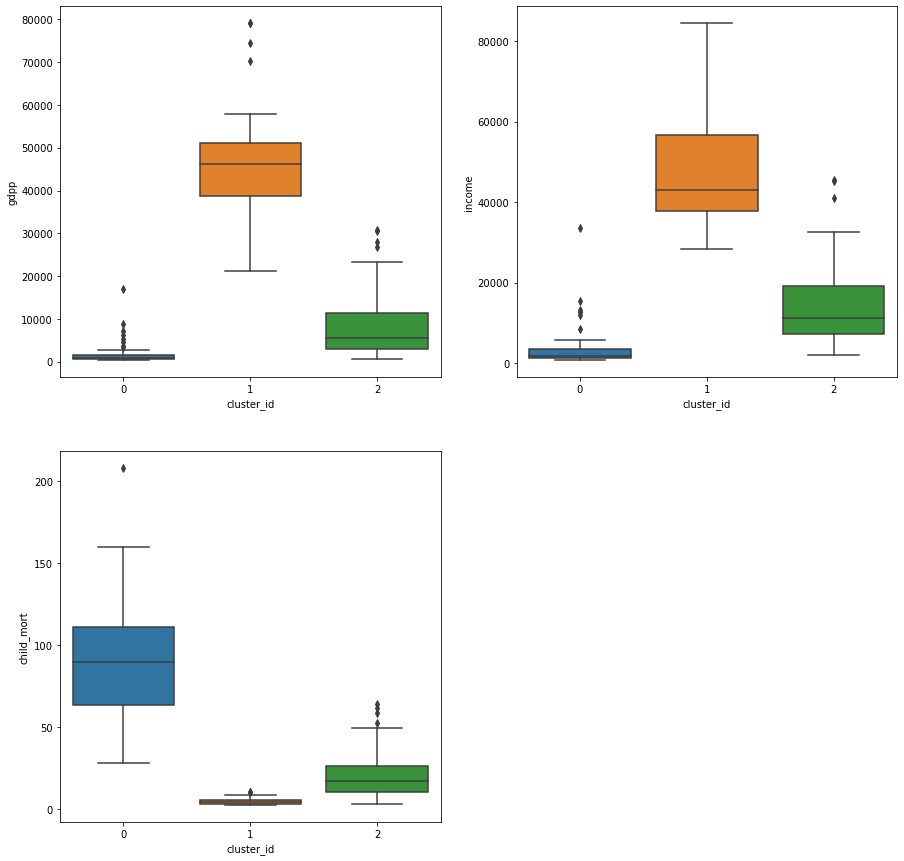

In [39]:
# Viewing gdpp, income, child_mort accross clusters using boxplot.
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
sns.boxplot(x="cluster_id",y="gdpp",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="cluster_id",y="income",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="cluster_id",y="child_mort",data=df)
plt.show()

`Inference`:
1. We can see that the cluster 0 is the group of countries with low income, low gdpp and high child mortality
2. Cluster 1 is the group of countries with high gdpp,high income and low child mortality.
3. Cluster 2 is the group of countries with low-medium gdpp,low-medium income and low-medium child mortality

From the graphs above we can conclude that the cluster 1 is our target cluster on which the NGO should spend the donation collected

## Results

In [40]:
#Creating a seperate dataframe for cluster label 0
df_1=df[df['cluster_id']==0]
df_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Cluster_id_H
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0


In [41]:
#Viewing top 7 countries afer sorting df_1 on ascending,ascending and desending for gdpp,income and child_mort respectively. 
df_1.sort_values(['gdpp','income','child_mort'],ascending=['True','True','False']).head(7)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Cluster_id_H
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0,0
132,Sierra Leone,160.0,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0,0


## Hierarchical Clustering

In [140]:
#viewing the scaled data
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569638,-0.566983,-0.598844,-0.851772,0.157336,-1.619092,1.926928,-0.702314
1,-0.538949,-0.473873,-0.440417,-0.413679,-0.387025,-0.312347,0.647866,-0.865911,-0.498775
2,-0.272833,-0.424015,-0.486295,-0.476198,-0.221124,0.789274,0.670423,-0.035427,-0.477483
3,2.007808,-0.381264,-0.534113,-0.464070,-0.612136,1.387054,-1.179234,2.154642,-0.531000
4,-0.695634,-0.086754,-0.178431,0.139659,0.125202,-0.601749,0.704258,-0.544433,-0.032079


### Single Linkage

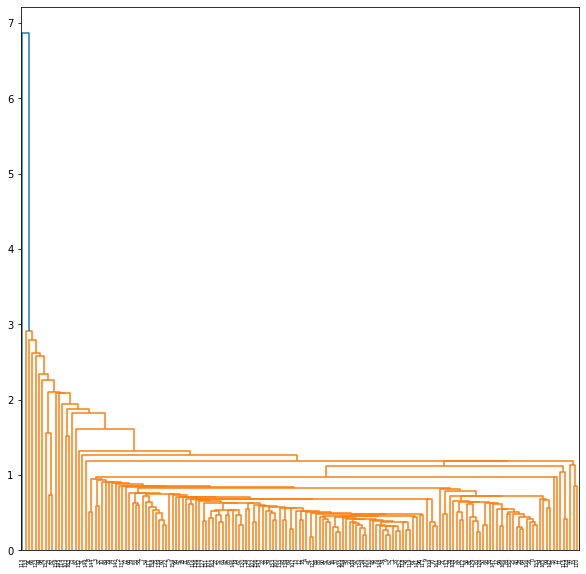

In [28]:
# single linkage
plt.figure(figsize=[10,10])
mergings = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

`Inference`:
This dendogram isn't easy to understand as well as if we cut the degrogram to get 3 or 4  number of clusters, we'll have two or more clusters with only one data point in it which would clealy state that the clusterng wasn't done properly.
Hence,let's try complete linkage

### Complete Linkage

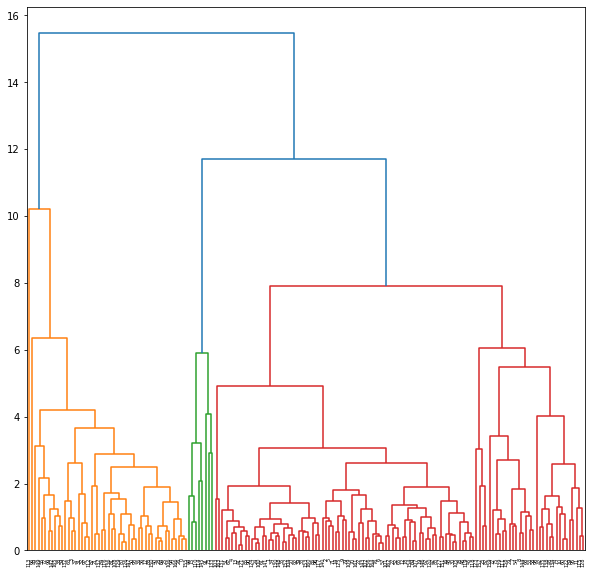

In [29]:
# complete linkage
plt.figure(figsize=[10,10])
mergings = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

`Inference`:
1. This is comparatvely easy to understand. 
2. If we make a cut at 10, we'll get 4 clusters but one of them will have only 1 data point which will make that cluster invalid or not well defined. 
3. Hence we'll make a cut at 11 where we'll get 3 clusters.

In [30]:
# Making 3 clusters and converting it into array
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [33]:
#Assigning cluster labels to the data pts and viewing it
df['Cluster_id_H']=cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Cluster_id_H
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,1


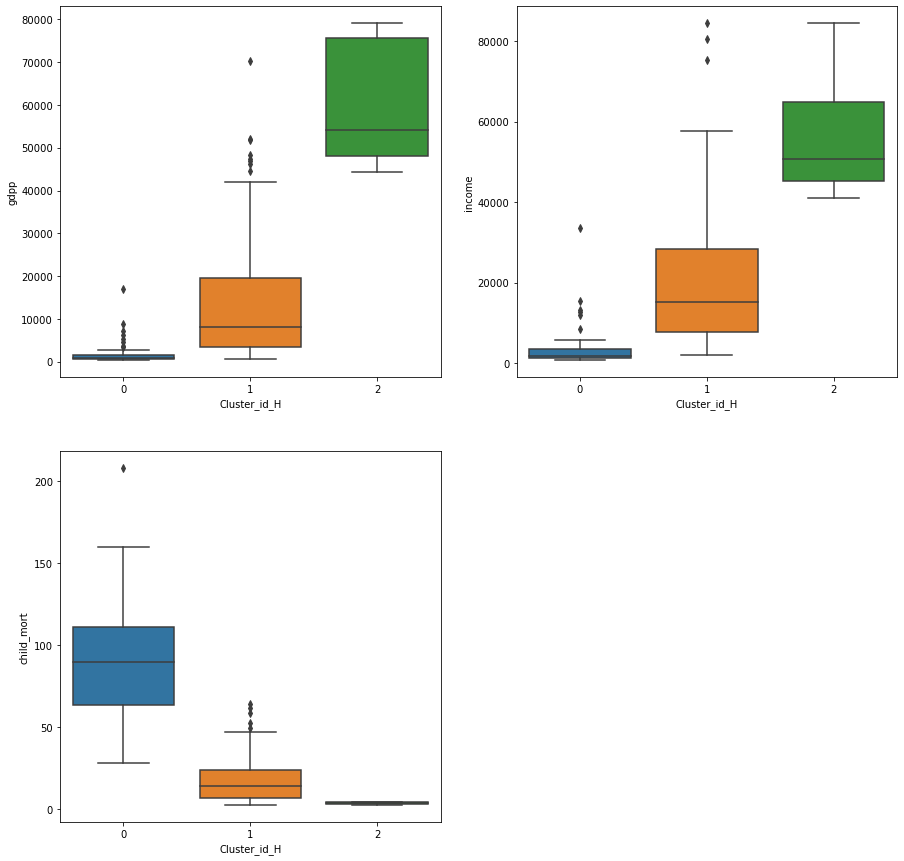

In [34]:
#Undersanding the clusters made by cierarchical clustering
plt.figure(figsize=[15,15])
plt.subplot(2,2,1)
sns.boxplot(x="Cluster_id_H",y="gdpp",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="Cluster_id_H",y="income",data=df)
plt.subplot(2,2,3)
sns.boxplot(x="Cluster_id_H",y="child_mort",data=df)
plt.show()

`Inference`:
1. CLuster 0 has low gdpp,low income and high child_mort
2. Cluster 1 has low-medium ggdp,low-medium income and low child_mort
3. Cluster 2 has high income, high gdp and low child_mort

Hence Cluster 0 will be our target group for investment

### Results from Hierarchial Clustering

In [35]:
#Creating a seperate dataframe for cluster label 0
df_H0=df[df['Cluster_id_H']==0]
df_H0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Cluster_id_H
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0


In [38]:
#Viewing top 7 countries afer sorting df_1 on ascending,ascending and desending for gdpp,income and child_mort respectively.
df_H0.sort_values(['gdpp','income','child_mort'],ascending=['True','True','False']).head(7)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Cluster_id_H
88,Liberia,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,0,0
26,Burundi,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,0,0
37,"Congo, Dem. Rep.",116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,0,0
112,Niger,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,0,0
132,Sierra Leone,160.0,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,0,0
93,Madagascar,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,0,0
106,Mozambique,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,0,0


The countries needed for aid are same through K-means and through Hierarchial custering.

In [37]:
# Getting the list of countries with least gdpp, least income, and highest cild_mort
print(list(df_H0.sort_values(['gdpp','income','child_mort'],ascending=['True','True','False']).head(7).country))

['Liberia', 'Burundi', 'Congo, Dem. Rep.', 'Niger', 'Sierra Leone', 'Madagascar', 'Mozambique']


Therefore we ssuggest CEO to assign the funds to the countries mentioned above.